2.1. Regresja liniowa

Plik fires_thefts.csv zawiera rzeczywiste dane zebrane przez U.S. Commission on Civil Rights,
przedstawiające liczbę pożarów w danej dzielnicy na tysiąc gospodarstw domowych (pierwsza kolumna)
oraz liczbę włamań w tej samej dzielnicy na tysiąc mieszkańców (druga kolumna).

Stwórz model (regresja liniowa) przewidujący liczbę włamań na podstawie liczby pożarów:

Oblicz parametry θ krzywej regresyjnej za pomocą metody gradientu prostego (gradient descent).
Możesz wybrać wersję iteracyjną lub macierzową algorytmu. Poeksperymentuj z różnymi wartościami
współczynnika szybkości uczenia α:
- α=0.001
- α=0.01
- α=0.1
Wykorzystując uzyskaną krzywą regresyjną przepowiedz liczbę włamań na tysiąc mieszkańców dla dzielnicy,
w której występuje średnio 50, 100, 200 pożarów na tysiąc gospodarstw domowych.

In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# IMPORT DATASET
df = pd.read_csv('fires_thefts.csv', header=None)
#df = pd.read_csv('data01_train.csv', header=None)


df = df.rename(columns={0 : 'fires',
                        1 : 'thefts'})

df = df.astype(float)
df.head()
df.dtypes

fires     float64
thefts    float64
dtype: object

In [4]:
X = df['fires']
y = df['thefts']

In [5]:
# GRADIENT DESCENT
def h(theta, X):
    return theta[0] + theta[1] * X

def J(h, theta, x, y):
    """Funkcja kosztu"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, X[i]) - y[i])**2 for i in range(m))


def gradient_descent(h, cost_fun, theta, X, y, alpha, eps):
    current_cost = cost_fun(h, theta, X, y)
    log = [[current_cost, theta]]  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    num = 0
    while True:
        #num += 1
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, X[i]) - y[i]
                                            for i in range(m)),   
            theta[1] - alpha/float(m) * sum((h(theta, X[i]) - y[i]) * X[i]
                                            for i in range(m))]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymaczasowej
        try:
            current_cost, prev_cost = cost_fun(h, theta, X, y), current_cost
        except OverflowError:
            break      
        if abs(prev_cost - current_cost) <= eps: #num >= eps:
            break     
        log.append([current_cost, theta])
    return theta, log

In [10]:
%%time
best_theta, log = gradient_descent(h, J, [0.0, 0.0], X, y, alpha=0.001, eps=0.01)

print(best_theta)
print(log)

[8.243197657007427, 1.7543021185820848]
[[825.8333333333333, [0.0, 0.0]], [563.3205018558991, [0.033666666666666664, 0.5471642857142859]], [416.8143732796651, [0.06035458855442176, 0.9558257707874152]], [335.0433399228353, [0.08182874067046803, 1.2610238544262686]], [289.3963671055084, [0.09940758295849653, 1.4889334326420989]], [263.907672932802, [0.11407602268645463, 1.6591074999673037]], [249.66789098457605, [0.126569798848707, 1.7861524026870033]], [241.70533803285298, [0.1374385184338478, 1.8809792752260344]], [237.2456715500947, [0.1470927453529616, 1.9517388797309159]], [234.74072844428127, [0.15583917649369075, 2.004519943638655]], [233.3265890854076, [0.16390691869925023, 2.043870827104417]], [232.52116141433737, [0.171467118020328, 2.073189215490151]], [232.0554241602879, [0.17864762302664577, 2.095013224823046]], [231.77925569282328, [0.18554393849521042, 2.1112388614346465]], [231.60888380736927, [0.19222740796074356, 2.1232824671959696]], [231.49756119109747, [0.1987513261

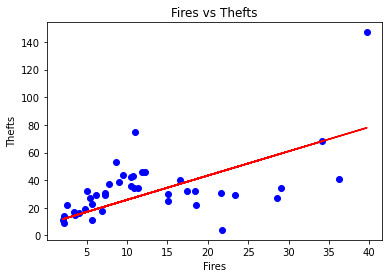

In [11]:
# VISUALISING THE SET RESULTS
plt.scatter(X, y, color = 'blue')
plt.plot(X, best_theta[0]+best_theta[1] * X, color = 'red')
plt.title('Fires vs Thefts')
plt.xlabel('Fires')
plt.ylabel('Thefts')
plt.show()

In [12]:
# PREDICT THEFTS

unknown_x = [50, 100, 200]
# eps=0.0000001 1e-7
best_theta_a = [16.96747476186552, 1.3148504023266523]
pred_ya = [best_theta_a[0] + best_theta_a[1] * x for x in unknown_x]

# eps=0.000001 1e-6
best_theta_b = [16.907608955621928, 1.31786591077309]
pred_yb = [best_theta_b[0] + best_theta_b[1] * x for x in unknown_x]

# eps=0.00001 1e-5
best_theta_c = [16.718377872462355, 1.3273976946978627]
pred_yc = [best_theta_c[0] + best_theta_c[1] * x for x in unknown_x]

# eps=0.0001 1e-4
best_theta_d = [16.119817880111995, 1.3575478392609843]
pred_yd = [best_theta_d[0] + best_theta_d[1] * x for x in unknown_x]

# eps=0.001 1e-3
best_theta_e = [14.226818648926447, 1.452900353975524]
pred_ye = [best_theta_e[0] + best_theta_e[1] * x for x in unknown_x]

# eps=0.01 1e-2
best_theta_f = [8.243197657007427, 1.7543021185820848]
pred_yf = [best_theta_f[0] + best_theta_f[1] * x for x in unknown_x]


pred_df = pd.DataFrame({'eps = 1e-7' : pred_ya,
                        'eps = 1e-6' : pred_yb,
                        'eps = 1e-5' : pred_yc,
                        'eps = 1e-4' : pred_yd,
                        'eps = 1e-3' : pred_ye,
                        'eps = 1e-2' : pred_yf},
                        index=['50', '100', '200'])
pred_df.index.name = 'Fires'
pred_df.columns.name = 'Predicted Thefts'
pred_df

Predicted Thefts,eps = 1e-7,eps = 1e-6,eps = 1e-5,eps = 1e-4,eps = 1e-3,eps = 1e-2
Fires,,,,,,
50,82.709995,82.800904,83.088263,83.997210,86.871836,95.958304
100,148.452515,148.694200,149.458147,151.874602,159.516854,183.673410
200,279.937555,280.480791,282.197917,287.629386,304.806889,359.103621
